**Install packages**

- azure-storage-blob (pip install azure-storage-blob)

- azure-identity (pip install azure-identity)

Use the following Python classes to interact with these resources:

|Python classes|Uses|
|-|-|
|**BlobServiceClient:** |The BlobServiceClient class allows you to manipulate Azure Storage resources and blob containers.|
|**ContainerClient:** |The ContainerClient class allows you to manipulate Azure Storage containers and their blobs.|
|**BlobClient:** |The BlobClient class allows you to manipulate Azure Storage blobs.|

**Importing package**

In [1]:
# connecting to storage account
from azure.storage.blob import BlobServiceClient
blob_acc_url="<Enter your blob URL>"
credential_key="<Enter your security key>"
blob_service_client=BlobServiceClient(account_url=blob_acc_url,
                                      credential=credential_key)
blob_service_client # storage account variable

# create container
**Method-1** :  Using blob service client

In [2]:
new_container=blob_service_client.create_container('tarunazurepractice',
                                                   public_access='Container')
new_container

**Method-2**

- we can create the container using get contianer client
- 
IN this way we can give access level

In [3]:
container_name='tarunmethod2'
contain_client=blob_service_client.get_container_client(container_name)
contain_client.create_container(public_access='container')

{'etag': '"0x8DCE3CE31438A5B"',
 'last_modified': datetime.datetime(2024, 10, 3, 17, 9, 50, tzinfo=datetime.timezone.utc),
 'client_request_id': '4e9abf2b-81aa-11ef-96f4-d83c7e0267e3',
 'request_id': 'be19f72d-701e-0053-4cb7-15ebab000000',
 'version': '2024-08-04',
 'date': datetime.datetime(2024, 10, 3, 17, 9, 50, tzinfo=datetime.timezone.utc)}

**Checking container properties**

In [4]:
# to check the container properties
contain_client.get_container_properties()

{'name': 'tarunmethod2', 'last_modified': datetime.datetime(2024, 10, 3, 17, 9, 50, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCE3CE31438A5B"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': {}, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001CED9ED4150>, 'immutable_storage_with_versioning_enabled': False}

In [5]:
# to check the container properties
new_container.get_container_properties()

{'name': 'tarunazurepractice', 'last_modified': datetime.datetime(2024, 10, 3, 17, 9, 50, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCE3CE311F2EB3"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': {}, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001CED9EB6850>, 'immutable_storage_with_versioning_enabled': False}

**List out All containers in storage account**

In [6]:
all_containers=blob_service_client.list_containers()
all_containers

<iterator object azure.core.paging.ItemPaged at 0x1ced9ed43d0>

In [7]:
# in above output says its iterator object so we need to get output using for loop
for container in all_containers:
    print(container)

{'name': 'method1', 'last_modified': datetime.datetime(2024, 9, 13, 9, 33, 33, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCD3D722A58869"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001CED91A0C10>, 'immutable_storage_with_versioning_enabled': False}
{'name': 'tarunazurepractice', 'last_modified': datetime.datetime(2024, 10, 3, 17, 9, 50, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCE3CE311F2EB3"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001CED9ED7690>, 'immutable_storage_

In [8]:
# or you can just get it by making it a list 
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'method1', 'last_modified': datetime.datetime(2024, 9, 13, 9, 33, 33, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCD3D722A58869"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001CED91ACA90>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'tarunazurepractice', 'last_modified': datetime.datetime(2024, 10, 3, 17, 9, 50, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCE3CE311F2EB3"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001CED91AFCD0>, 'immutable_stora

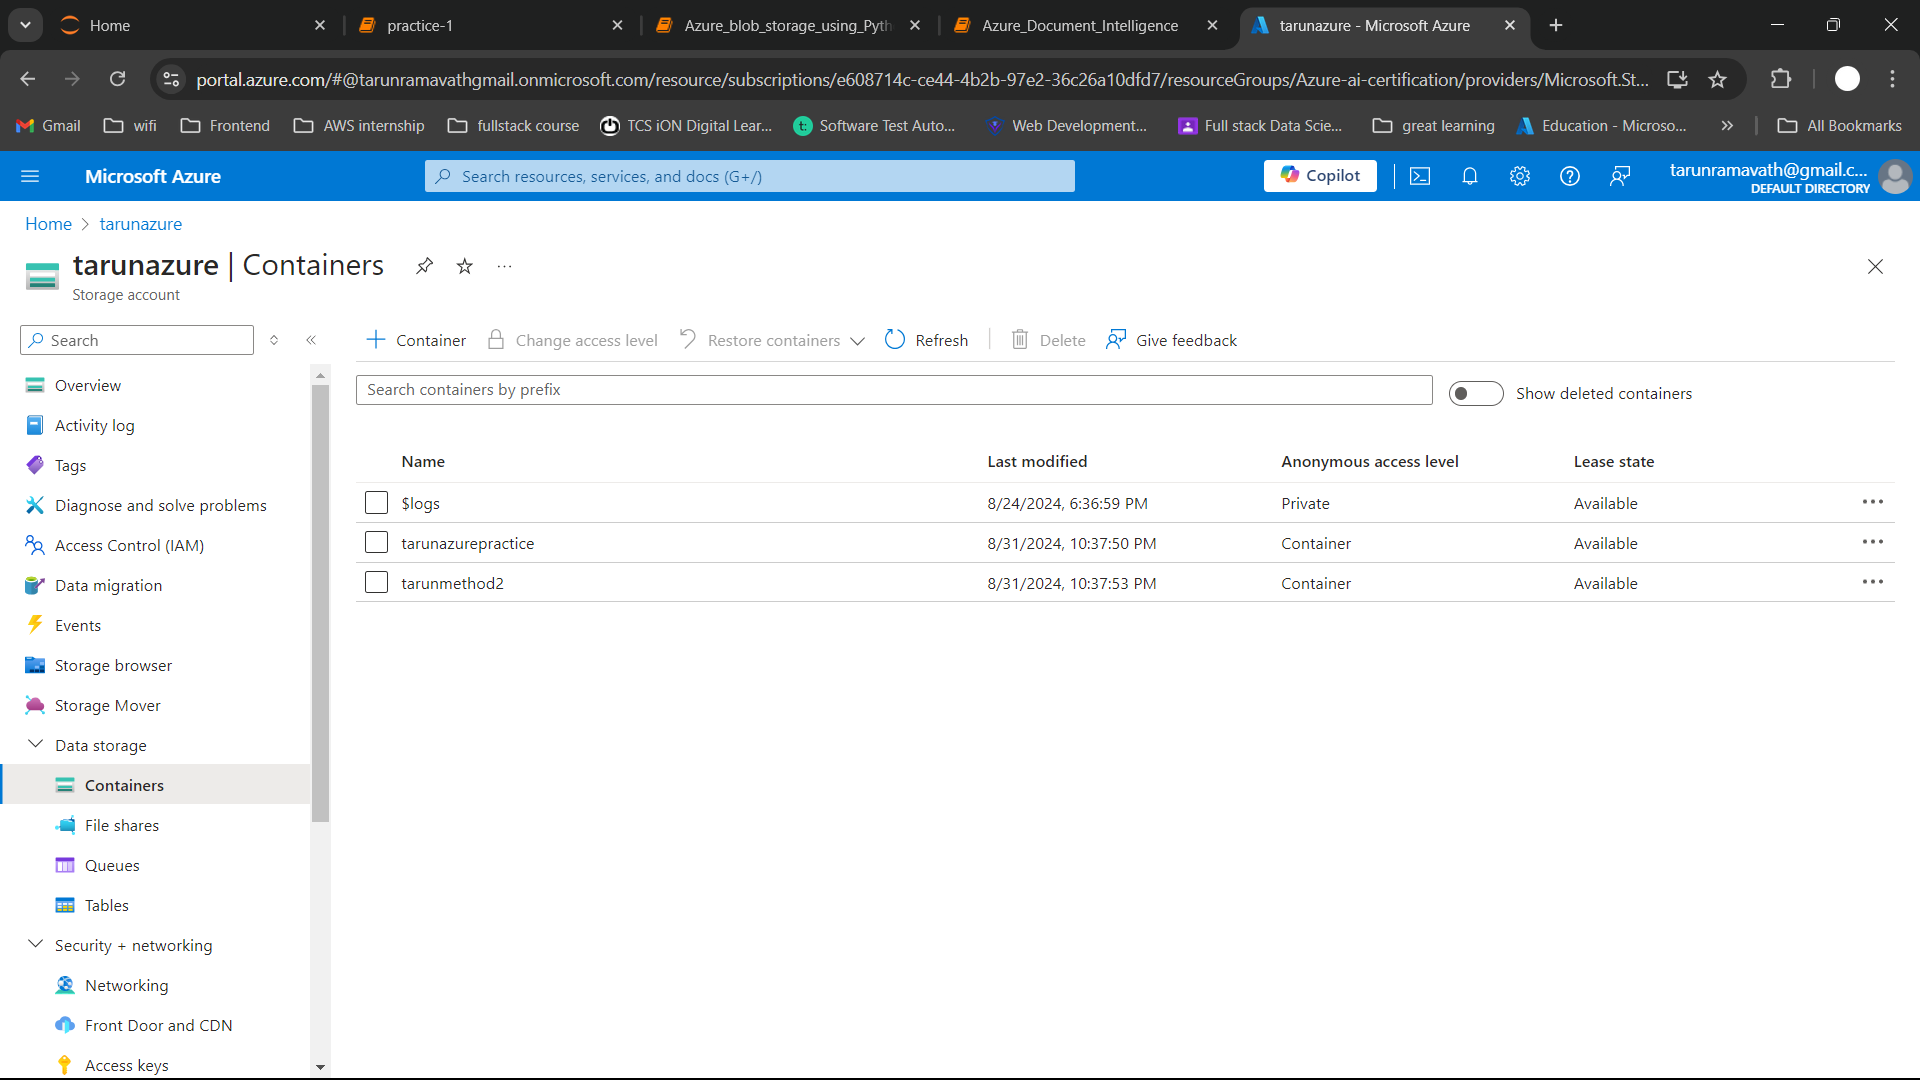

## Delete the Container

- by using delete_container() method

In [9]:
all_containers=blob_service_client.list_containers()
print('Containers present in storage account : ')
for container in all_containers:
    print(container['name'])
# we need only names of containers from the above dictionary

Containers present in storage account : 
method1
tarunazurepractice
tarunmethod2


In [10]:
all_containers=blob_service_client.list_containers()
for container in all_containers:
    print(f"Deleting {container['name']} ......")
    blob_service_client.delete_container(container['name'])

Deleting method1 ......
Deleting tarunazurepractice ......
Deleting tarunmethod2 ......


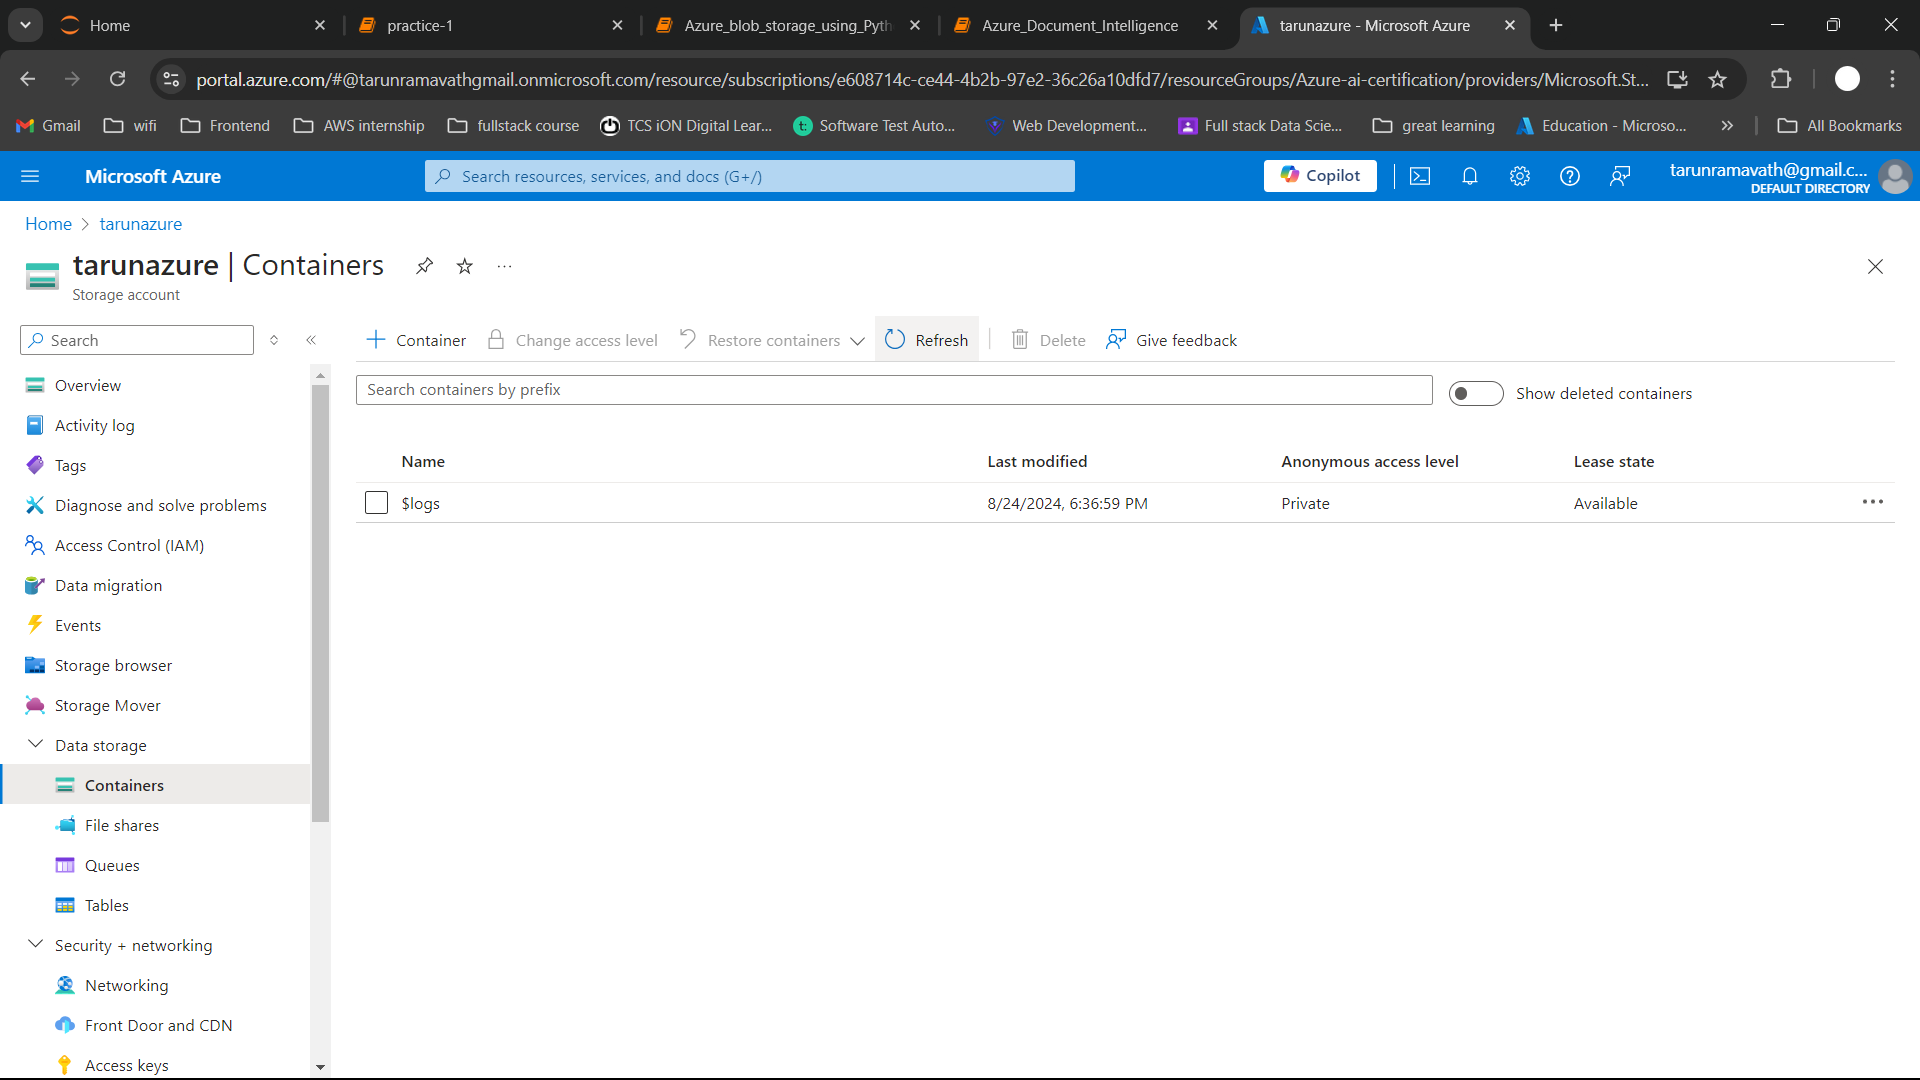

## Uploading a blob

- We have deleted all containers so lets create a new container first

- Then lets uplode our blob in container

- At last we will access the blob

In [11]:
# storage account is still connect so create a container directly
new_container=blob_service_client.create_container('azurepractice-1',public_access='container')
new_container

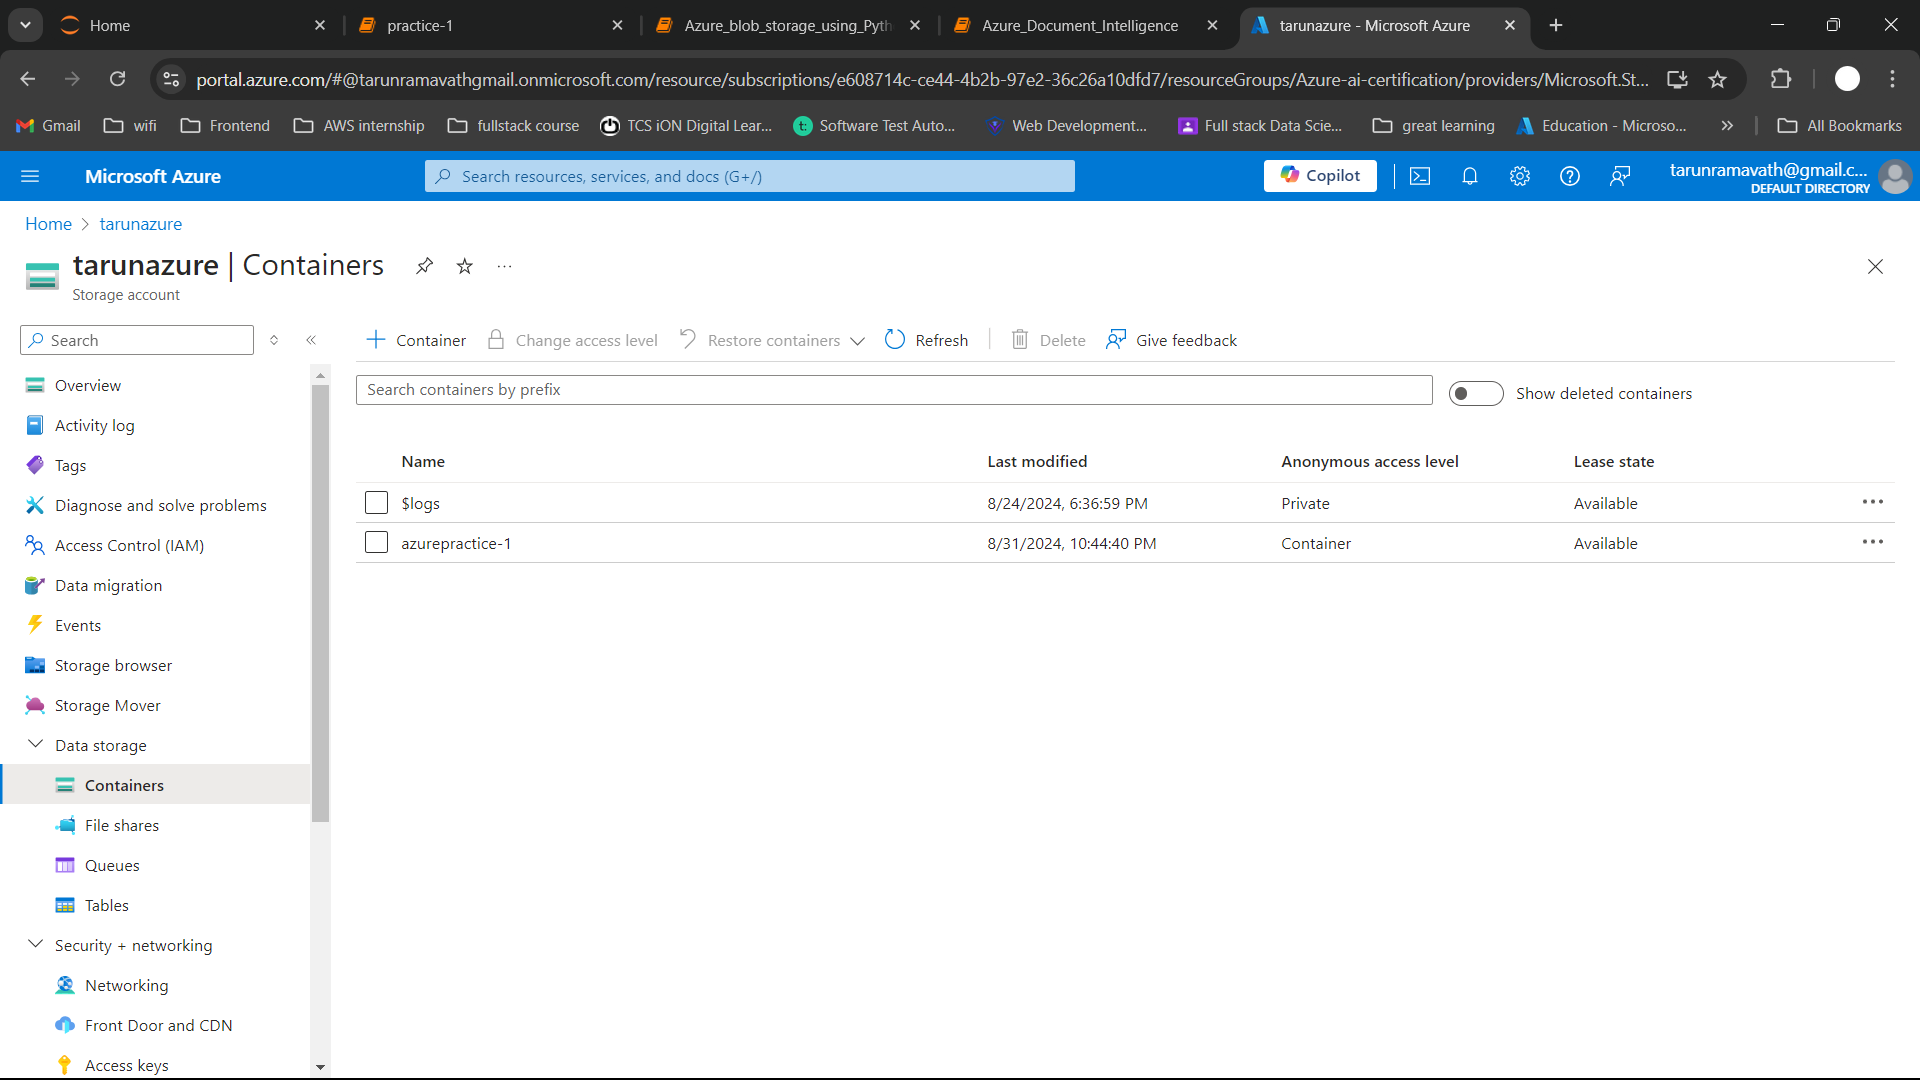

**Uploading a text file**

In [14]:
# Create a BlobClient instance for the specified blob
blob_name="mbox-short.txt"
file_path=r"C:\Users\DELL\OneDrive\Documents\NareshIT\Data files\mbox-short.txt"
contain_client=blob_service_client.get_container_client('azurepractice-1')
blob_client=contain_client.get_blob_client(blob_name)

# uploading text file
with open(file_path,'rb') as data:
    blob_client.upload_blob(data,overwrite=True)

**Uploading csv file**

In [15]:
# Create a BlobClient instance for the specified blob
blob_name="Visadataset.csv"
file_path=r"C:\Users\DELL\OneDrive\Documents\NareshIT\Data files\Visadataset.csv"
contain_client=blob_service_client.get_container_client('azurepractice-1')
blob_client=contain_client.get_blob_client(blob_name)

# uploading csv file
with open(file_path,'rb') as data:
    blob_client.upload_blob(data,overwrite=True)

**Uploading image**

In [16]:
# Create a BlobClient instance for the specified blob
blob_name="kids_image.png"
file_path=r"C:\Users\DELL\OneDrive\Documents\NareshIT\Data files\imagekids.png"
contain_client=blob_service_client.get_container_client('azurepractice-1')
blob_client=contain_client.get_blob_client(blob_name)

# uploading a image
with open(file_path,'rb') as data:
    blob_client.upload_blob(data,overwrite=True)

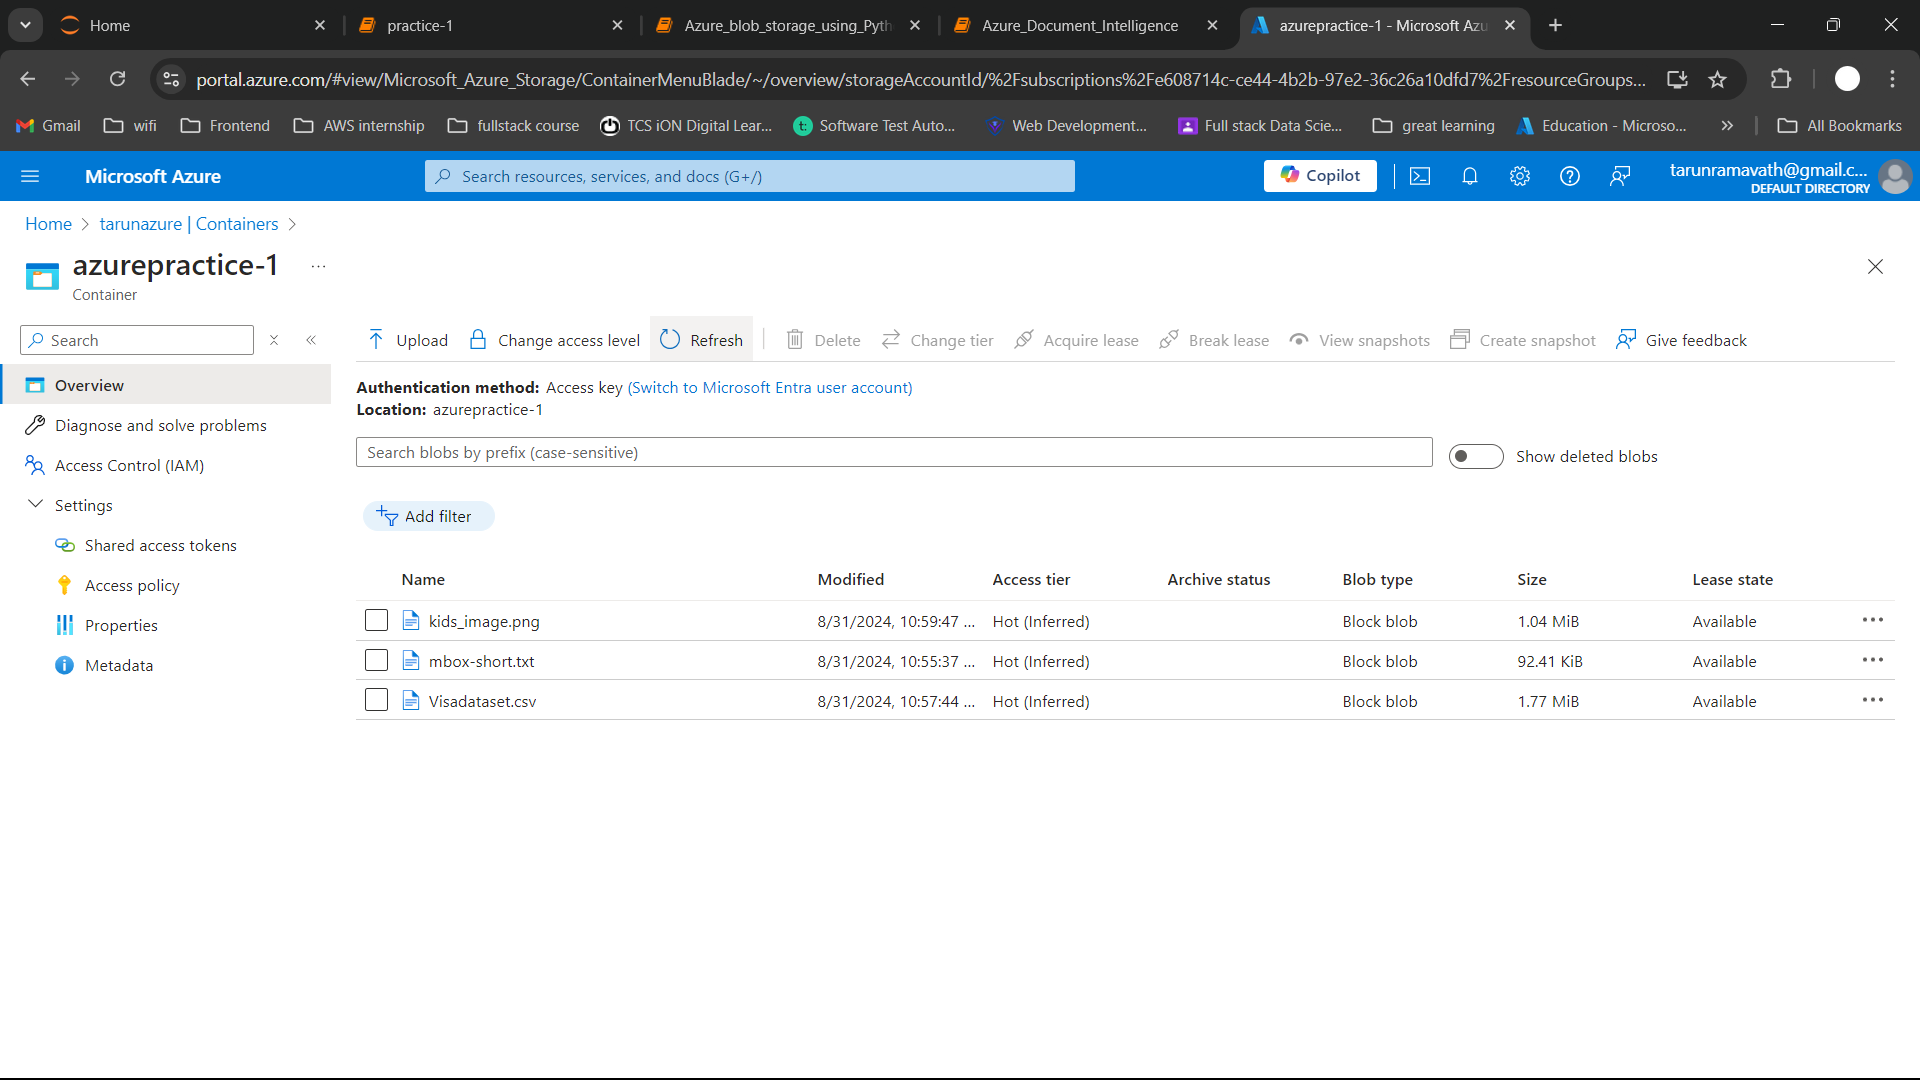

**Accessing the files**

In [17]:
# To get only blob names
container_client=blob_service_client.get_container_client('azurepractice-1')
for blob in contain_client.list_blob_names():
    print(blob)

Visadataset.csv
kids_image.png
mbox-short.txt


In [18]:
container_client=blob_service_client.get_container_client('azurepractice-1')
for blob in contain_client.list_blobs():
    print(blob)

{'name': 'Visadataset.csv', 'container': 'azurepractice-1', 'snapshot': None, 'version_id': None, 'is_current_version': None, 'blob_type': <BlobType.BLOCKBLOB: 'BlockBlob'>, 'metadata': {}, 'encrypted_metadata': None, 'last_modified': datetime.datetime(2024, 10, 3, 17, 11, 15, tzinfo=datetime.timezone.utc), 'etag': '0x8DCE3CE639E1A8F', 'size': 1855358, 'content_range': None, 'append_blob_committed_block_count': None, 'is_append_blob_sealed': None, 'page_blob_sequence_number': None, 'server_encrypted': True, 'copy': {'id': None, 'source': None, 'status': None, 'progress': None, 'completion_time': None, 'status_description': None, 'incremental_copy': None, 'destination_snapshot': None}, 'content_settings': {'content_type': 'application/octet-stream', 'content_encoding': None, 'content_language': None, 'content_md5': bytearray(b'[RI\xd5\x8fkq\x83\xa0R9W[H\x8f\xf4'), 'content_disposition': None, 'cache_control': None}, 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}

**Accessing csv file**

- we are accessing a csv file so we need pandas

In [19]:
blob_client=blob_service_client.get_blob_client('azurepractice-1','Visadataset.csv')
blob=blob_client.download_blob()
import pandas as pd
pd.read_csv(blob)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


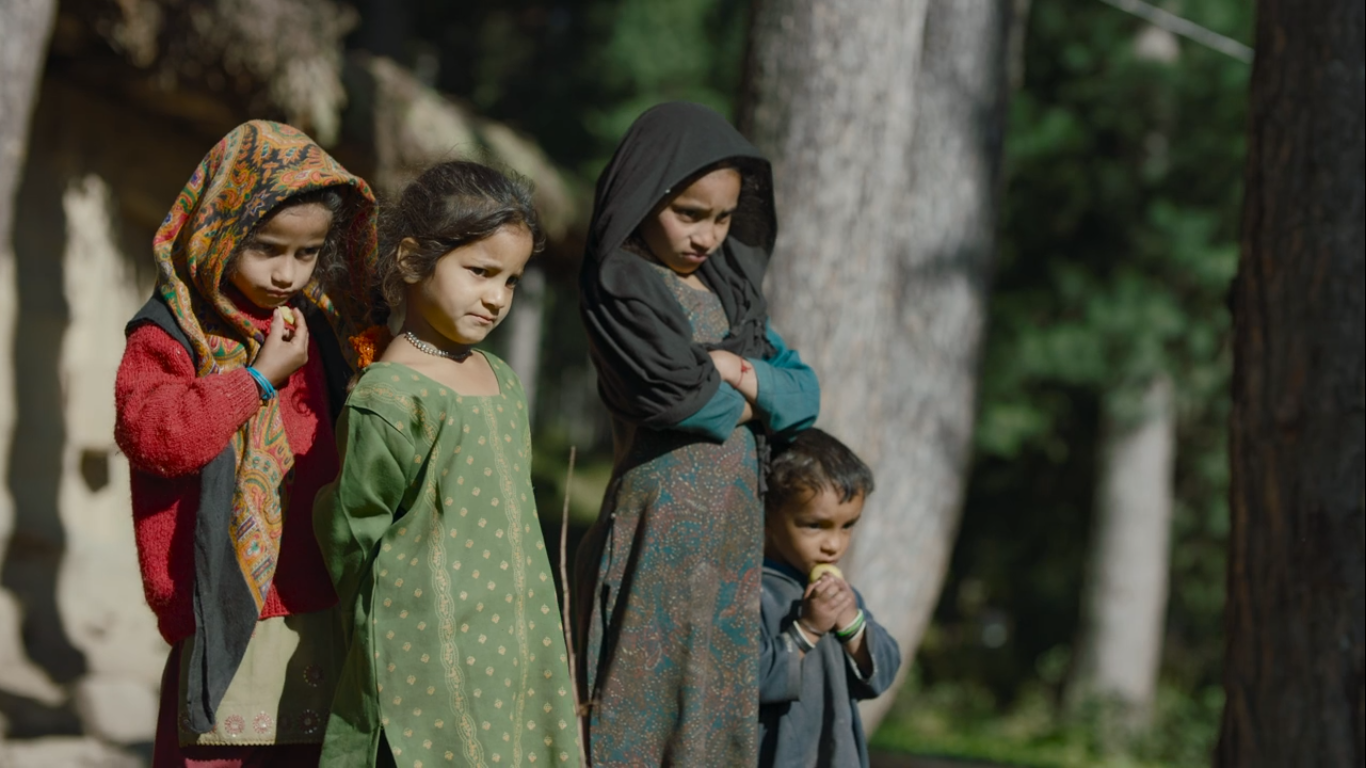

In [20]:
blob_client=blob_service_client.get_blob_client('azurepractice-1','kids_image.png')
blob=blob_client.download_blob()
from PIL import Image
Image.open(blob)